In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
df = pd.read_csv('/content/moonDataset.csv')
df.head()

,X1,X2,X3,label
0,-0.926767,-0.111073,0.086017,0
1,-0.917583,0.706006,0.058041,0
2,0.437984,0.899093,0.072543,0
3,0.089694,0.291446,0.070444,1
4,0.110672,-0.070806,-0.090376,1


In [20]:
df.shape

(200, 4)

Text(0.5, 0, 'X3')

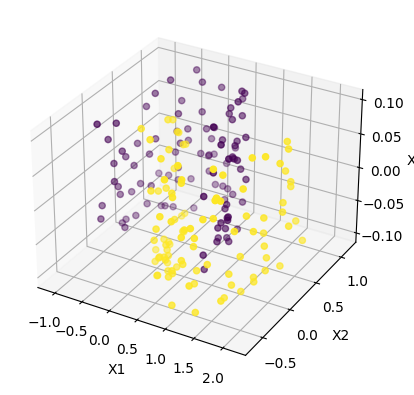

In [21]:
data = np.loadtxt('//content/moonDataset.csv', delimiter=',', skiprows=1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=data[:, 3])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

In [22]:
# Extract features and labels
X = data[:, :3]
y = data[:, 3]

In [23]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Build the neural network model
model = Sequential()
model.add(Dense(16, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

In [26]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
5/5 [==============================] - 1s 8ms/step - loss: 0.6615 - accuracy: 0.5625
Epoch 2/50
5/5 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.5938
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6425 - accuracy: 0.6250
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6342 - accuracy: 0.6500
Epoch 5/50
5/5 [==============================] - 0s 6ms/step - loss: 0.6254 - accuracy: 0.6938
Epoch 6/50
5/5 [==============================] - 0s 5ms/step - loss: 0.6174 - accuracy: 0.7500
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6093 - accuracy: 0.7688
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6018 - accuracy: 0.7688
Epoch 9/50
5/5 [==============================] - 0s 5ms/step - loss: 0.5933 - accuracy: 0.8000
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 0.5852 - accuracy: 0.8125
Epoch 11/50
5/5 [======================

In [28]:
# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 97.50
